<b> Описание проекта - исследование причины (или причин) убыточных вложений в рекламную компанию за период 1 мая - 27 октября 2019г.

Ваша роль:
Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+

Проблема:
Огромные вложения в рекламу, за период 1 мая - 27 октября 2019г сгенерировали компании убытки 

Цель работы:
Найти причины убытков и сформулировить тербования, которые помогут компании выйти в плюс

Доступные данные:
данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года
- лог сервера с данными об их посещениях
- выгрузка их покупок за этот период 
- рекламные расходы

Вопросы, на которые необходимо ответит:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
visits = pd.read_csv('C:/Users/MaCSC LLC/datasets/visits_info_short.csv')
orders = pd.read_csv('C:/Users/MaCSC LLC/datasets/orders_info_short.csv')
costs = pd.read_csv('C:/Users/MaCSC LLC/datasets/costs_info_short.csv')

In [3]:
print('Смотрим датафрейм visits')
print('_______________________________________________________________________')
print(' ')
print(visits.head())
print(' ')
print(visits.info())
print(' ')
print('Полных дубликатов: ',visits.duplicated().sum())
print('Пропусков: ',visits.isnull().sum())
print(' ')


Смотрим датафрейм visits
_______________________________________________________________________
 
        User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40  
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         3099

In [4]:
print('Смотрим датафрейм orders')
print('_______________________________________________________________________')
print(' ')
print(orders.head())
print(' ')
print(orders.info())
print(' ')
print('Полных дубликатов: ',orders.duplicated().sum())
print('Пропусков: ',orders.isnull().sum())
print(' ')

Смотрим датафрейм orders
_______________________________________________________________________
 
        User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
 
Полных дубликатов:  0
Пропусков:  User Id     0
Event Dt    0
Revenue     0
dtype: int64
 


In [5]:
print('Смотрим датафрейм costs')
print('_______________________________________________________________________')
print(' ')
print(costs.head())
print(' ')
print(costs.info())
print(' ')
print('Полных дубликатов: ',costs.duplicated().sum())
print('Пропусков: ',costs.isnull().sum())
print(' ')

Смотрим датафрейм costs
_______________________________________________________________________
 
           dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None
 
Полных дубликатов:  0
Пропусков:  dt         0
Channel    0
costs      0
dtype: int64
 


Выводы по исходным датафреймам:
1. Пропусков и дубликатов нигде нет.
2. Формат даты датафрейма visits в столбцах 'Session Start' и 'Session End' в формате object - переделаем в to_datetime
3. Формат даты датафрейма orders столбец 'Event Dt' в формате object - переделаем в to_datetime
4. Формат даты датафрейма costs столбец 'dt' в формате object - переделаем в to_datetime
5. Т.к. далее мы будем использовать готовые функции из урока, приведем название столбцов в соответствии с уже написанными функциями 

In [6]:
# откорректируем исходные датафреймы
visits.columns=['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']
orders.columns=['user_id', 'event_dt', 'revenue']
costs.columns = ['dt', 'channel', 'costs']

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

orders['event_dt'] = pd.to_datetime(orders['event_dt'])

costs['dt'] = pd.to_datetime(costs['dt']).dt.date

print(visits.info())
print(orders.info())
print(costs.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage:

Выполнили предобработку. Теперь данные готовы для исследования.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

Раз можно использовать код с теоретических уроков, то займемся ctrl+c и ctrt+v

In [7]:
# get_profiles() — для создания профилей пользователей
def get_profiles(sessions, orders, ad_costs):
    # Шаг 1. Передадим в функцию расчета профиля данные о рекламных затратах (фрейм ad_costs)
    
    # сортируем сессии по id пользователя и дате для того,чтобы работал first
    # находим первые значения для параметров пользователя - будем считать их основными 
    profiles = (sessions.sort_values(by = ['user_id', 'session_start'])           
                        .groupby('user_id').agg({'session_start' : 'first',       
                                                 'channel': 'first',
                                                 'device': 'first',
                                                 'region': 'first'})                                 
                        .rename(columns = {'session_start' : 'first_ts'})  
                        .reset_index()  # вернем все данные из индекса в колонки                                           
               )
    # определим дату первого посещеня 
    # и начало месяца первого посещения - они понадобятся нам при когортном анализе
    profiles['dt'] = profiles['first_ts'].dt.date                                 
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')     
    
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())   
            
    # Шаг 2. К данным о рекламных затратах добавим количества привлеченных пользователей
    new_users = profiles.groupby(['dt', 'channel']).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'unique_users'}).reset_index()
    ad_costs = ad_costs.merge(new_users, on = ['dt', 'channel'], how = 'left')
    
    # Шаг 3. Найдем среднюю стоимость привлечения пользователя
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    
    # Шаг 4. Присоединим данные к профилям пользователей информацию о средней стоимости привлечения в день привлечения пользователя из нужного источника
    profiles = profiles.merge(ad_costs[['dt', 'channel', 'acquisition_cost']], on = ['dt', 'channel'], how = 'left')
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0) # органические пользователи будут стоить 0
    
    return profiles



In [8]:
# get_retention() — для подсчёта Retention Rate
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
 
    dimensions = ['payer'] + dimensions
 
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
 
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days
 
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
 
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
 
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
 
    return result_raw, result_grouped, result_in_time




In [9]:
#get_conversion() — для подсчёта конверсии,

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time


In [10]:
# get_ltv() — для подсчёта LTV
def get_ltv(profiles, purchases, observation_date, horizon_days, dimensions = [], ignore_horizon = False):
    # Шаг 1. Получить профили пользователей и список пользовательских покупок
    # мы получаем их через аргументы profiles и purchases
    
    # оттсекаем всех пользователей, которые не могли "дожить" до нужного горизонта 
    # (присоединились позже чем observation_date - horizon)
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
 
    # Шаг 2. Присоединить покупки к профилям пользователей и расчитать для каждой покупки время жизни пользователя (lifetime)
    # формируем массив сырых данных
    result_raw = result_raw.merge(purchases[['user_id', 'event_dt', 'revenue']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days
    
    # этот столбец мы будем использовать для группировки в случае, когда в dimensions ничего не передано
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']  
    
    # функция группировки по нужному набору измерений
    def group_by_dimensions(df, dims, horizon_days):  
        # Шаг 3. Построить сводную таблицу, у которой в строках находятся даты первой посещения пользователей, в столбцах - lifetime, а в ячейках сумма покупок пользователей на заданный лайфтайм. Таким образом, мы получим таблицу выручки
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'revenue', aggfunc = 'sum')         # строим "треугольную таблицу"         
        
        # Шаг 4. Просуммировать ячейки таблицы конверсии вдоль каждого ряда с накоплением
        result = result.fillna(0).cumsum(axis = 1)
        
        # Шаг 5. Расчитать размеры когорт и соединить таблицы размеров когорт и таблицу конверсии
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) # определяем размеры когорт
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   # присоединяем размеры когорт к треугольной таблице
        
        # Шаг 6. Разделить каждую ячейку таблицы выручки на соответствующий размер когорты
        result = result.div(result['cohort_size'], axis = 0)                                                     # делим каждый из столбцов на размер когорты 
        result = result[['cohort_size'] + list(range(horizon_days))]                                             # оставляем только наблюдения до нужного горизонта и столбец размеров когорт
        result['cohort_size'] = cohort_sizes                                                                     # пересприсваиваем столбец размеров когорт, ведь во время деления он превратился в 1
        
        # Шаг 7. Расчитать CAC
        # в таблице df одному пользователю соответствует несколько строк, поэтому 
        # вернемся к уникальным пользователям с помощью drop_duplicates
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = cac.groupby(dims).agg({'acquisition_cost': 'mean'}).rename(columns = {'acquisition_cost': 'cac'})
        
        # Шаг 8. Разделить LTV на CAC
        roi = result.div(cac['cac'], axis = 0)
 
        # Шаг 9. Исключить из результатов строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        
        # добавим красивости - починим размеры когорт и добавим в таблицу cac
        # и выведем все в формате cohort_size, cac, все остальные столбцы
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        
        return result, roi
 
      # расчитываем LTV и ROI
    result_grouped, roi_groupped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # рассчитываем LTV и ROI по всем параметрам + дата
    if 'cohort' in dimensions: dimensions = []  # здесь у нас есть дополнительное измерение - дата, поэтому cohort больше не понадобится
    result_in_time, roi_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    # возвращаем и таблицы LTV, ROI и сырые данные (чтобы в случае чего можно было в них покопаться при отладке)
    return result_raw, result_grouped, result_in_time, roi_groupped, roi_in_time
   

In [11]:
#plot_retention() — для построения графика Retention Rate,
def plot_retention(retention, retention_history, horizon, window = 7):
    # задаем сетку отрисовки графкиов
    plt.subplots(figsize = (15, 10))
    
    # проверим размер индекса - если в нем только один столбец payer, 
    # то добавим еще один - иначе функция будет ломаться
    # такую процедуру уже делали для расчета конверсии и ltv
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users' 
        retention = retention.reset_index().set_index(['cohort', 'payer']) 
    
    # удалим колонки, которые нам не потребуются, а для истории оставляем только нужный lifetime
    retention = retention.drop(columns = ['cohort_size', 0]) 
    retention_history = retention_history.drop(columns = ['cohort_size'])[[horizon - 1]]
    
    # первый график - кривые удержание для платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(grid = True, ax = ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Удержание платящих пользователей')  
    
    # второй график - кривые удержание для неплатящих пользователей
    ax2 = plt.subplot(2, 2, 2, sharey = ax1)
    retention.query('payer == False').droplevel('payer').T.plot(grid = True, ax = ax2)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Удержание неплатящих пользователей')
    
    # третий график - динамика изменения удержания для платящих пользователей
    ax3 = plt.subplot(2, 2, 3)
    # в колонки сводной таблицы для графиков попадут все колонки индекса, кроме даты и признака платящих пользователей
    columns = [name for name in retention_history.index.names if name not in ['dt', 'payer']] 
    filtered_data = retention_history.query('payer == True').pivot_table(index = 'dt', columns = columns, values = horizon - 1, aggfunc = 'mean')
    filter_data(filtered_data, window).plot(grid = True, ax = ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика удержания платящих пользователей на {}-й день'.format(horizon))  
    
    # четвертый график - динамика изменения удержания для неплатящих пользователей
    ax4 = plt.subplot(2, 2, 4, sharey = ax3)
    filtered_data = retention_history.query('payer == False').pivot_table(index = 'dt', columns = columns, values = horizon - 1, aggfunc = 'mean')
    filter_data(filtered_data, window).plot(grid = True, ax = ax4)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика удержания неплатящих пользователей на {}-й день'.format(horizon))   
    
    # иногда графики могут накладываться друг на друга
    # чтобы этого избежать - используем tight_layout
    plt.tight_layout() 
    
    plt.show()


In [12]:
#plot_conversion() — для построения графика конверсии

def plot_conversion(conversion, conversion_history, horizon, window = 7):
    # задаем сетку отрисовки графкиков
    plt.subplots(figsize = (15, 10))
    
    # удалим колонки, которые нам не потребуются, а для истории оставляем только нужный lifetime
    conversion = conversion.drop(columns = ['cohort_size']) 
    conversion_history = conversion_history.drop(columns = ['cohort_size'])[[horizon - 1]]
    
    # первый график - кривые конверсии
    ax1 = plt.subplot(2, 2, 1)
    conversion.T.plot(grid = True, ax = ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Конверсия пользователей')  
    
    # второй график - динамика конверсии
    ax2 = plt.subplot(2, 2, 2, sharey = ax1)
    # в колонки сводной таблицы для графиков попадут все колонки индекса, кроме даты 
    columns = [name for name in conversion_history.index.names if name not in ['dt']] 
    filtered_data = conversion_history.pivot_table(index = 'dt', columns = columns, values = horizon - 1, aggfunc = 'mean')
    filter_data(filtered_data, window).plot(grid = True, ax = ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))  
    
    # иногда графики могут накладываться друг на друга
    # чтобы этого избежать - используем tight_layout
    plt.tight_layout() 
    
    plt.show()
 
horizon_days = 14 


In [13]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

3.1 Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.

In [14]:
# Профили пользователей
print('Профили пользователей:')
print('__________________________________________________________________________________________')
print(' ')
profiles = get_profiles(visits, orders, costs)
display(profiles.head(5))
#observation_date = pd.to_datetime(2019, 11,1) 
horizon_days = 14

Профили пользователей:
__________________________________________________________________________________________
 


,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Вывод: Составили профили пользователей

<div class="alert alert-info"> REV 03-10-2022 Проверим даты создания профилей

In [15]:
min_date = profiles['dt'].min()
max_date = profiles['dt'].max()

print('Самая ранняя дата создание профиля:', min_date)
print('Самая поздняя дата создание профиля:', max_date)

Самая ранняя дата создание профиля: 2019-05-01
Самая поздняя дата создание профиля: 2019-10-27


Вывод: профили соответствуют временным датам поставленной задачи. Чистка данных не требуется, можно продолжпать исследование. 

3.2 Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.

Составили профили. Горизонт взяли 14 дней.

In [16]:
# Платящие пользователи по странам
table1 = profiles.groupby('region').agg({'payer':'sum'}) 
#print(table1)
table2= profiles.groupby('region').agg({'payer':'count'})
#print(table2)
table = table1.merge(table2, on=['region'], how='left')
table.columns = ['payer', 'total']
table['coversion'] = table['payer']/table['total']*100
ss=table.sort_values(by=['coversion'], ascending=False)
print(ss)

               payer   total  coversion
region                                 
United States   6902  100002   6.901862
Germany          616   14981   4.111875
UK               700   17575   3.982930
France           663   17450   3.799427


Вывод: US на первом месте по количеству юзеров и по конверсии. Тут нет ничего необычного, развитая страна с высокими доходами населения.

3.3 Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [17]:
devices = profiles.groupby('device').agg({'device':'count'})
devices.columns = ['payer']
pay_clients = profiles.groupby('device').agg({'payer':'sum'}) 
#print (devices)
#print (pay_clients)
final_table = devices.merge(pay_clients, on = ['device'], how = 'left')
final_table.columns = ['device', 'payer']
final_table['conversion'] = final_table['payer']/final_table['device']*100
final3_3=final_table.sort_values(by=['conversion'], ascending = False)
print (final3_3)


         device  payer  conversion
device                            
Mac       30042   1912    6.364423
iPhone    54479   3382    6.207897
Android   35032   2050    5.851793
PC        30455   1537    5.046790


Вывод: пользователи Mac и IPhone самые платежеспособные.

3.4 Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [18]:
profit_channal = profiles.groupby('channel').agg({'acquisition_cost':'sum'})
profit_channal_user_total = profiles.groupby('channel').agg({'user_id':'count'})
profit_channal_user_total_payer = profiles.groupby('channel').agg({'payer':'sum'})
profit_channal = profit_channal.merge(profit_channal_user_total, on = ['channel'], how = 'left')
profit_channal = profit_channal.merge(profit_channal_user_total_payer, on = ['channel'], how = 'left')
profit_channal = profit_channal.sort_values(by=['acquisition_cost'], ascending = False)
profit_channal.columns = (['acquisition_cost','total_user', 'payer_user'])
profit_channal['conversion'] = profit_channal['payer_user']/profit_channal['total_user']*100
profit_channal['CAC'] = profit_channal['acquisition_cost']/profit_channal['total_user']
display(profit_channal)


,acquisition_cost,total_user,payer_user,conversion,CAC
channel,,,,,
TipTop,54751.30,19561,1878,9.600736,2.799003
FaceBoom,32445.60,29144,3557,12.204914,1.113286
WahooNetBanner,5151.00,8553,453,5.296387,0.602245
AdNonSense,3911.25,3880,440,11.340206,1.008054
OppleCreativeMedia,2151.25,8605,233,2.707728,0.250000
RocketSuperAds,1833.00,4448,352,7.913669,0.412095
LeapBob,1797.60,8553,262,3.063253,0.210172
lambdaMediaAds,1557.60,2149,225,10.469986,0.724802
MediaTornado,954.48,4364,156,3.574702,0.218717


Вывод: Канал TipTop самый догорой для привлечения. 

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

4.1 Посчитайте общую сумму расходов на маркетинг.

In [19]:
total_costs_m = profiles['acquisition_cost'].sum()
print('Общие затраты на маркетинг по всем каналам:', round((total_costs_m),2))


Общие затраты на маркетинг по всем каналам: 105497.3


4.2 Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [20]:
total_costs_for_marketing = profiles.groupby('channel').agg({'acquisition_cost':'sum'})
total_costs_for_marketing = total_costs_for_marketing.sort_values(['acquisition_cost'], ascending = False)
print(total_costs_for_marketing)


                    acquisition_cost
channel                             
TipTop                      54751.30
FaceBoom                    32445.60
WahooNetBanner               5151.00
AdNonSense                   3911.25
OppleCreativeMedia           2151.25
RocketSuperAds               1833.00
LeapBob                      1797.60
lambdaMediaAds               1557.60
MediaTornado                  954.48
YRabbit                       944.22
organic                         0.00


График затрат по каналам

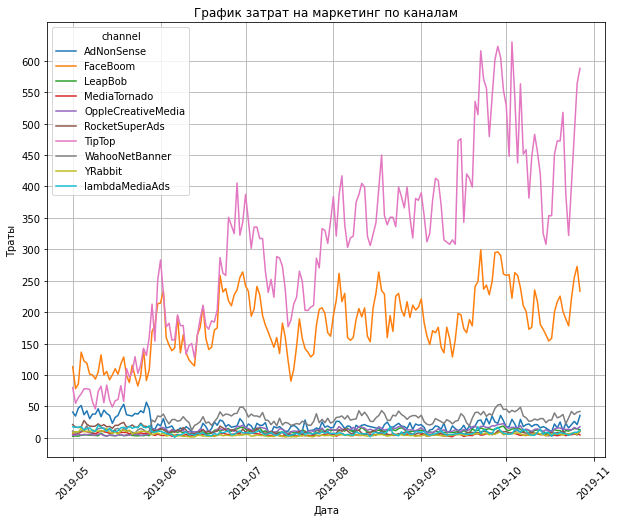

In [21]:
filtered_data = costs.pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    )
filtered_data.plot(                                             
           figsize=(10, 8), # размеры картинки: (x_size, y_size)
           grid=True, # отображать сетку или нет
           rot=45,        
           label='Каналы', # название линии                       
           legend=True,# выводить ли легенду к графику
     ) 

plt.yticks(np.arange(0, 650, 50)) #зададим шаг по oy
plt.title('График затрат на маркетинг по каналам')
plt.xlabel('Дата')
plt.ylabel('Траты')
plt.show()

График затрат по неделям

In [22]:
costs['Расходы на привлечение по неделям'] = costs['dt'].astype('datetime64[W]')
print(costs.head())

           dt   channel  costs Расходы на привлечение по неделям
0  2019-05-01  FaceBoom  113.3                        2019-04-25
1  2019-05-02  FaceBoom   78.1                        2019-05-02
2  2019-05-03  FaceBoom   85.8                        2019-05-02
3  2019-05-04  FaceBoom  136.4                        2019-05-02
4  2019-05-05  FaceBoom  122.1                        2019-05-02


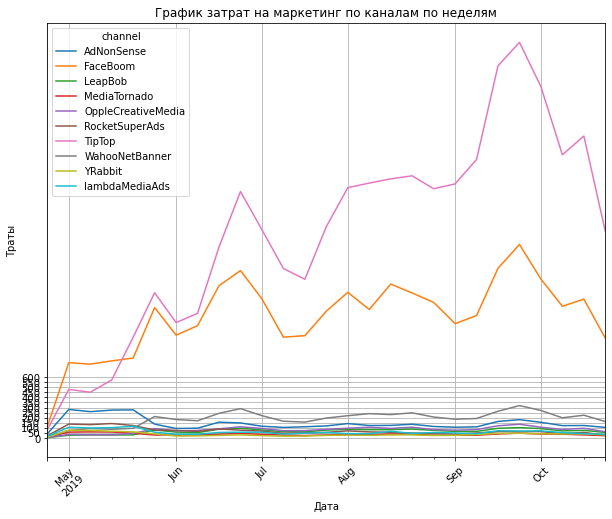

In [23]:
filtered_data = costs.pivot_table(
        index='Расходы на привлечение по неделям', columns='channel', values='costs', aggfunc='sum'
    )
filtered_data.plot(                                             
           figsize=(10, 8), # размеры картинки: (x_size, y_size)
           grid=True, # отображать сетку или нет
           rot=45,        
           label='Каналы', # название линии                       
           legend=True,# выводить ли легенду к графику
     ) 

plt.yticks(np.arange(0, 650, 50)) #зададим шаг по oy
plt.title('График затрат на маркетинг по каналам по неделям')
plt.xlabel('Дата')
plt.ylabel('Траты')
plt.show()

График затра по месяцам

In [24]:
costs['Расходы на привлечение по месяцам'] = costs['dt'].astype('datetime64[M]')
print (costs.head())


           dt   channel  costs Расходы на привлечение по неделям  \
0  2019-05-01  FaceBoom  113.3                        2019-04-25   
1  2019-05-02  FaceBoom   78.1                        2019-05-02   
2  2019-05-03  FaceBoom   85.8                        2019-05-02   
3  2019-05-04  FaceBoom  136.4                        2019-05-02   
4  2019-05-05  FaceBoom  122.1                        2019-05-02   

  Расходы на привлечение по месяцам  
0                        2019-05-01  
1                        2019-05-01  
2                        2019-05-01  
3                        2019-05-01  
4                        2019-05-01  


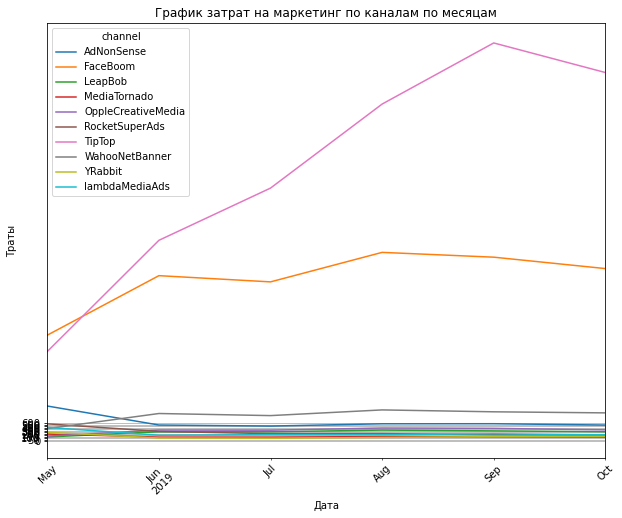

In [25]:
filtered_data = costs.pivot_table(
        index='Расходы на привлечение по месяцам', columns='channel', values='costs', aggfunc='sum'
    )
filtered_data.plot(                                             
           figsize=(10, 8), # размеры картинки: (x_size, y_size)
           grid=True, # отображать сетку или нет
           rot=45,        
           label='Каналы', # название линии                       
           legend=True,# выводить ли легенду к графику
     ) 

plt.yticks(np.arange(0, 650, 50)) #зададим шаг по oy
plt.title('График затрат на маркетинг по каналам по месяцам')
plt.xlabel('Дата')
plt.ylabel('Траты')
plt.show()

4.3 Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.

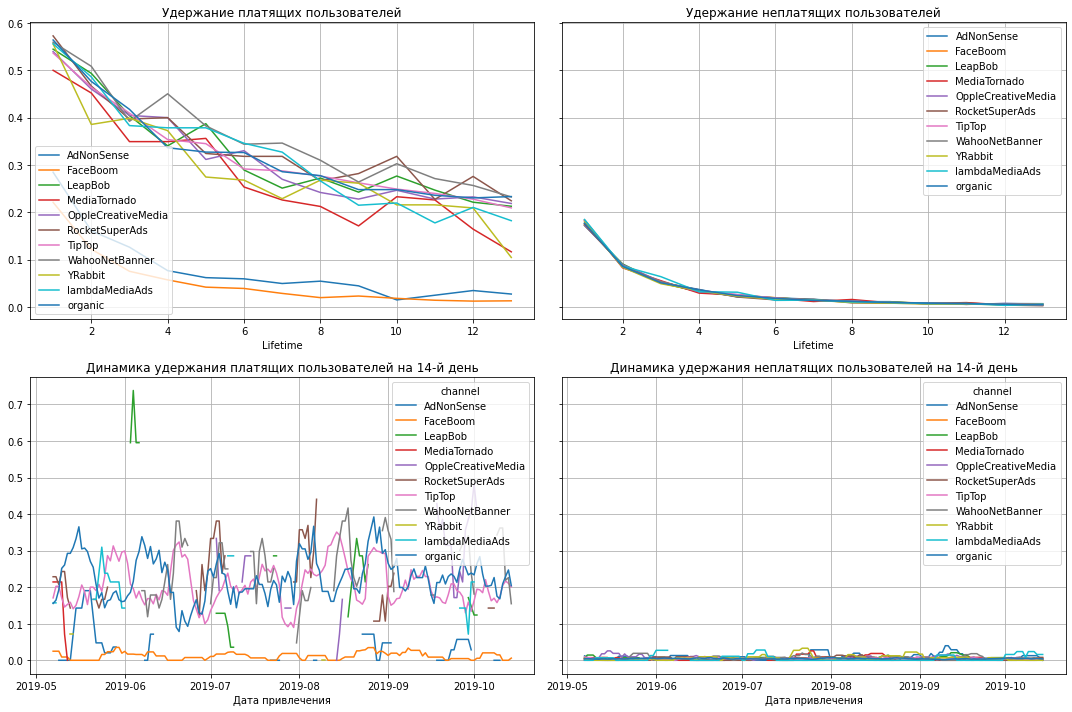

In [26]:
#разбивка по каналам
retention_channel_raw, retention_channel, retention_channel_history = get_retention(profiles,
                                                                                visits,
                                                                                max_date,
                                                                                14,
                                                                                ['channel'])
def filter_data(df, window):
    # для каждой колонки применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#print(retention_channel_history)
plot_retention(retention_channel, retention_channel_history, 14, 7)

4.4 Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [27]:
profit_channal = profit_channal.sort_values(['CAC'], ascending = False)
display(profit_channal['CAC'])

channel
TipTop                2.799003
FaceBoom              1.113286
AdNonSense            1.008054
lambdaMediaAds        0.724802
WahooNetBanner        0.602245
RocketSuperAds        0.412095
OppleCreativeMedia    0.250000
YRabbit               0.218975
MediaTornado          0.218717
LeapBob               0.210172
organic               0.000000
Name: CAC, dtype: float64

Вывод: Привлечения через TipTop самое дорогое, а через MediaTornado,YRabbit,LeapBob - тройка бюджетных.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

5.1 Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [28]:
# добавляем новое условие - ислючаем органических пользователей
profiles = profiles.query('channel != "organic"')

In [29]:
# функция для визуализации LTV и ROI
# у меня в исходном коде не работет эта функция. Не стоит графики. Я ее взял готовую

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

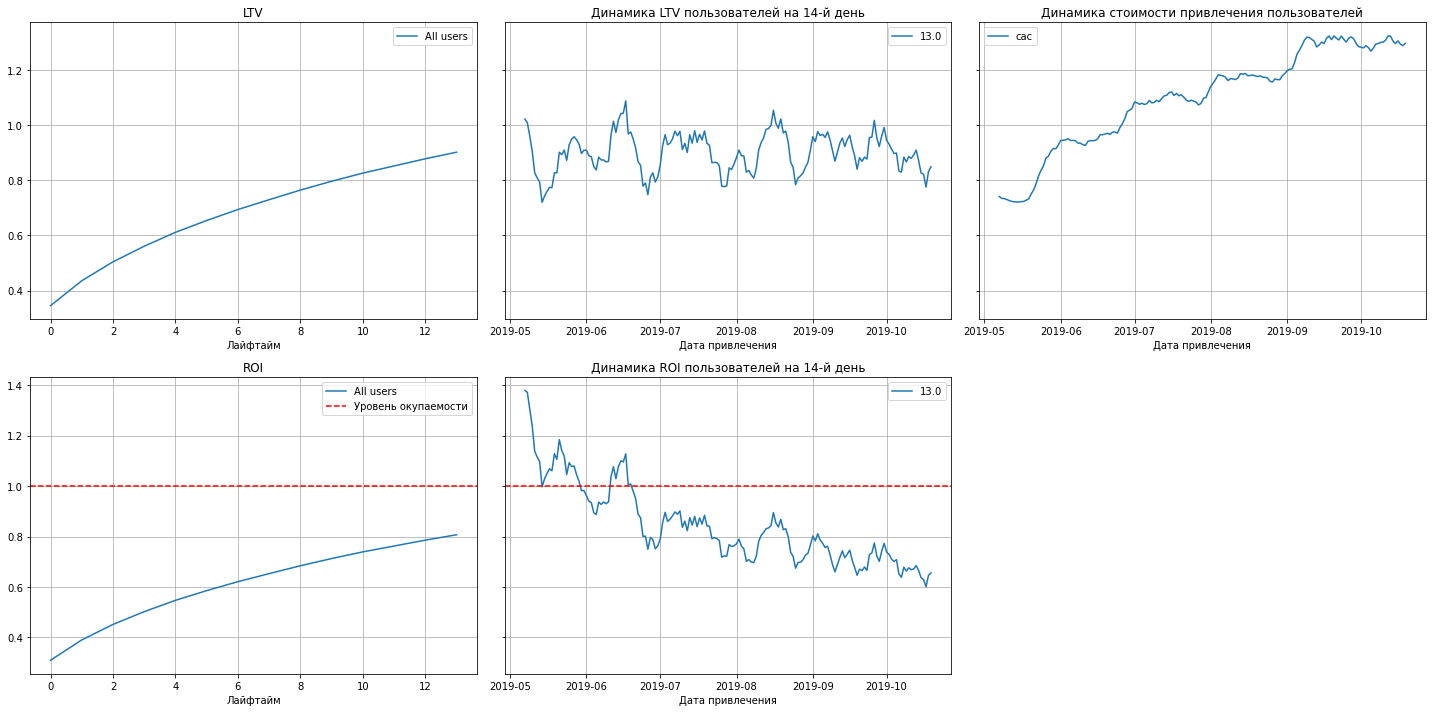

In [30]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df
#LTV
ltv_raw, ltv_grouped, ltv_history,  roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days)
plot_ltv_roi(ltv_grouped, ltv_history,  roi_grouped, roi_history, horizon_days)



Вывод:
1. Реклама не окупается за 14 дней. ROI в концу рассматриваемого чуть выше 80%.
2. LTV стабильный
3. CAC - стоимость рекламы растет
4. ROI пользователей падает, с начала лета пошли убытки.

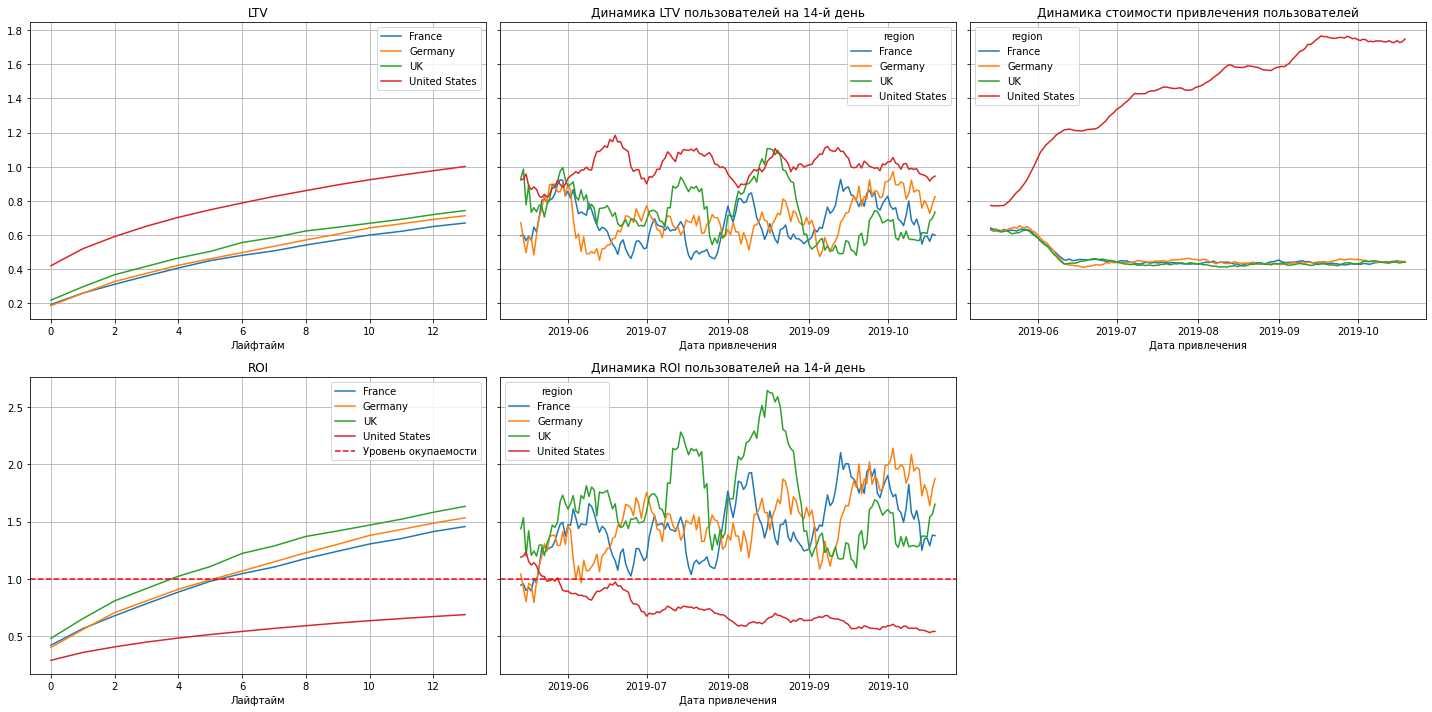

In [31]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

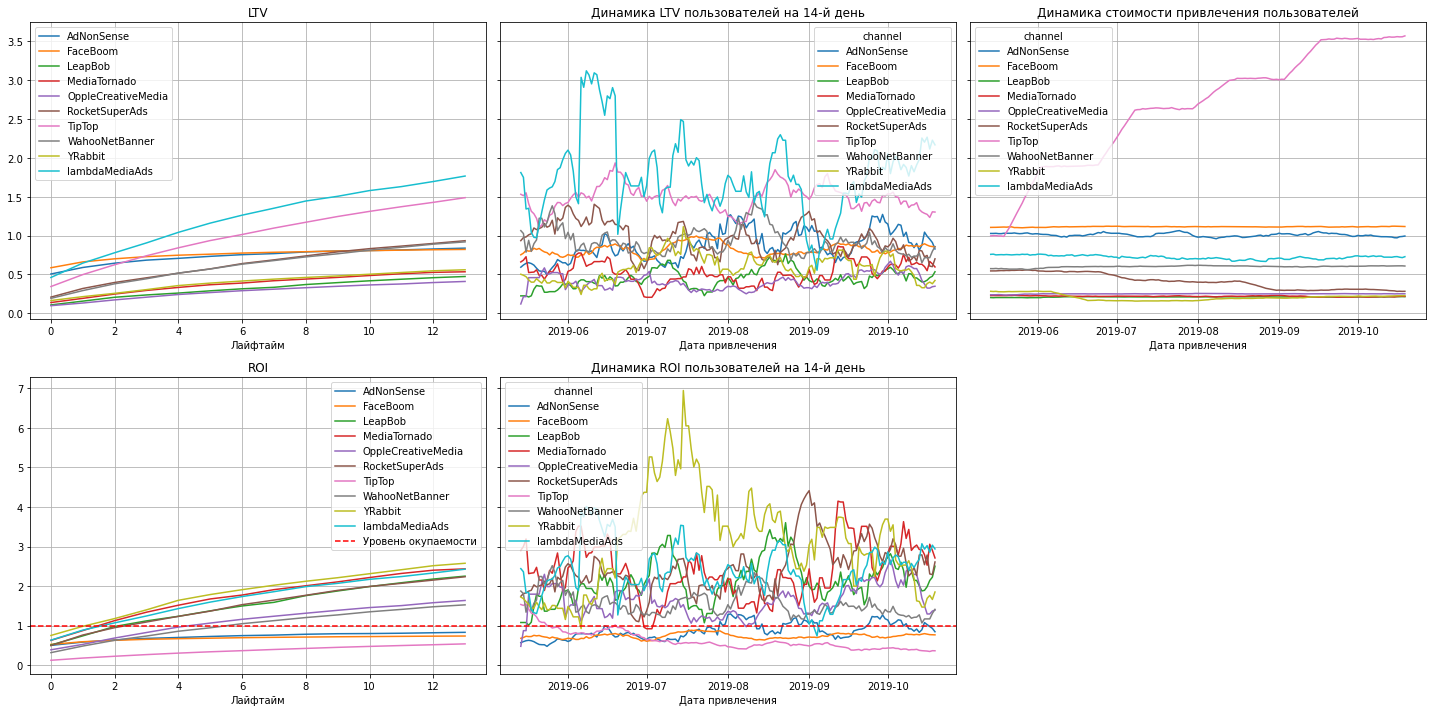

In [32]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

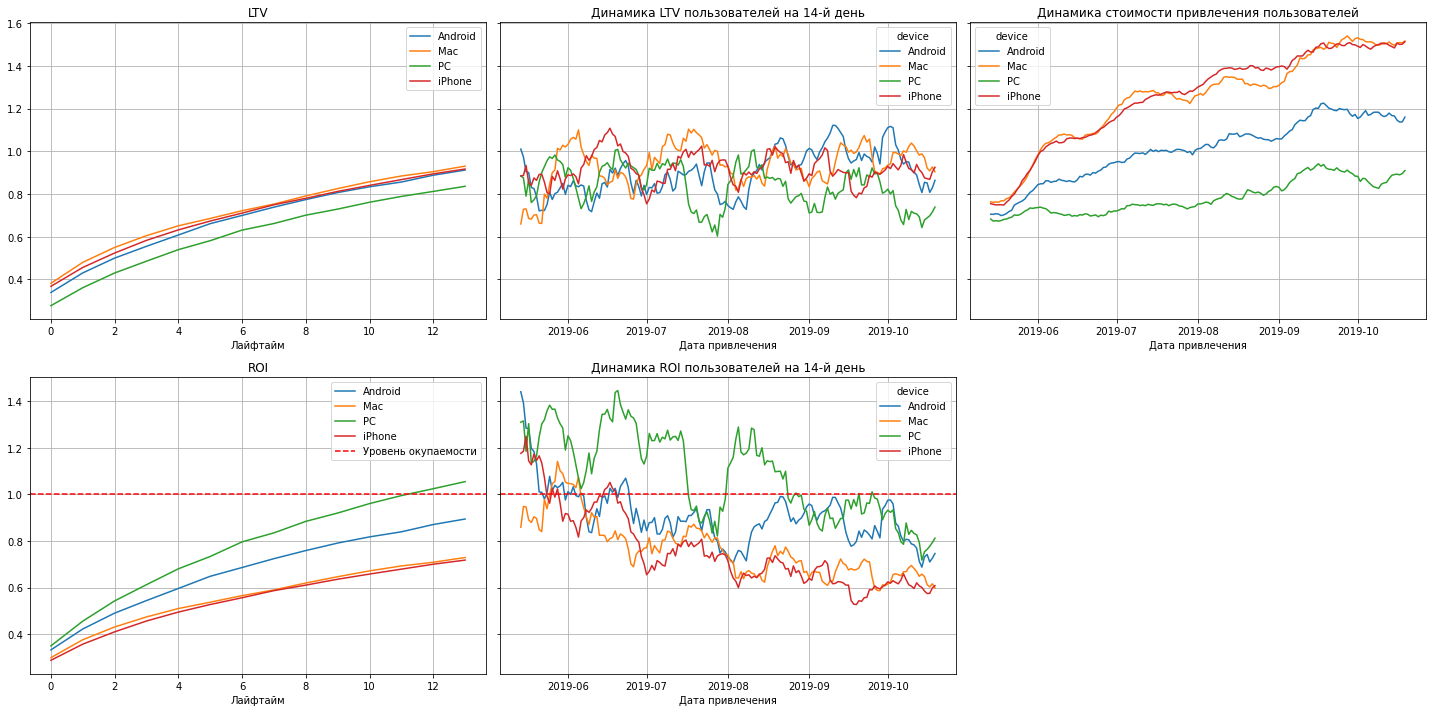

In [33]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Вывод: Пользователи PC стабильно окупаются, владельцы Android в небольшом минусе, а IPhone и Mac  — нет.

5.2 Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.

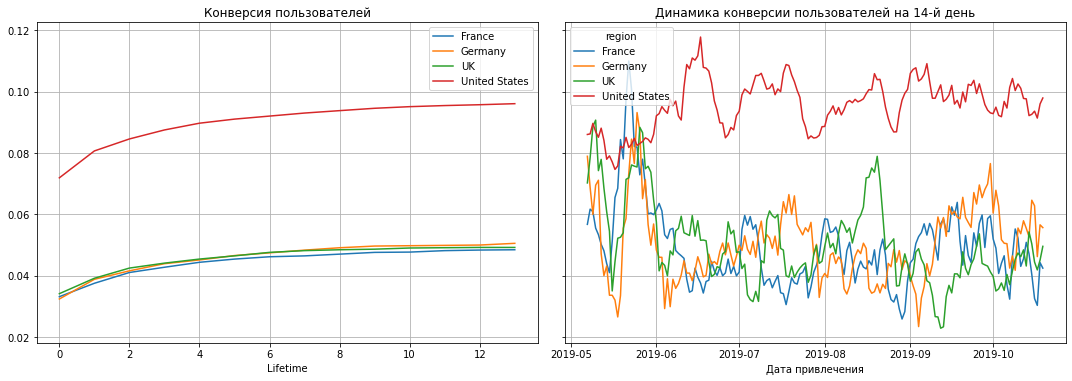

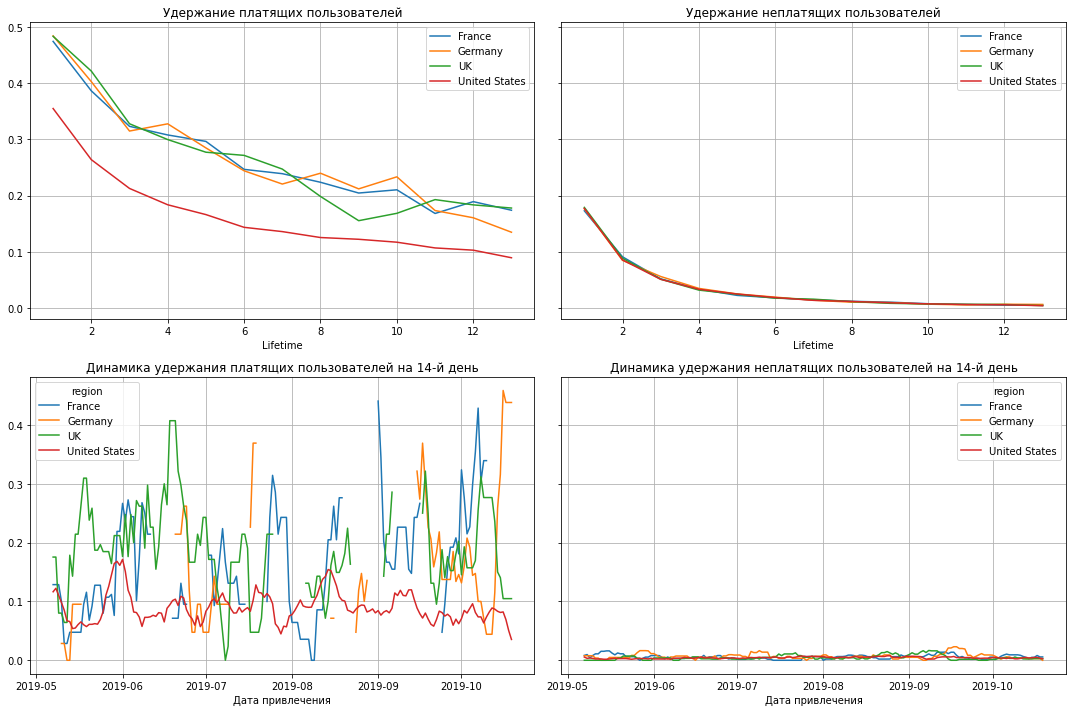

In [34]:
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Выводы:
1. Пользователи USA конвертируются лучше чем остальные
2. А вот удержание наоборот, USA тыстро теряют интерес. 

5.3 Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI

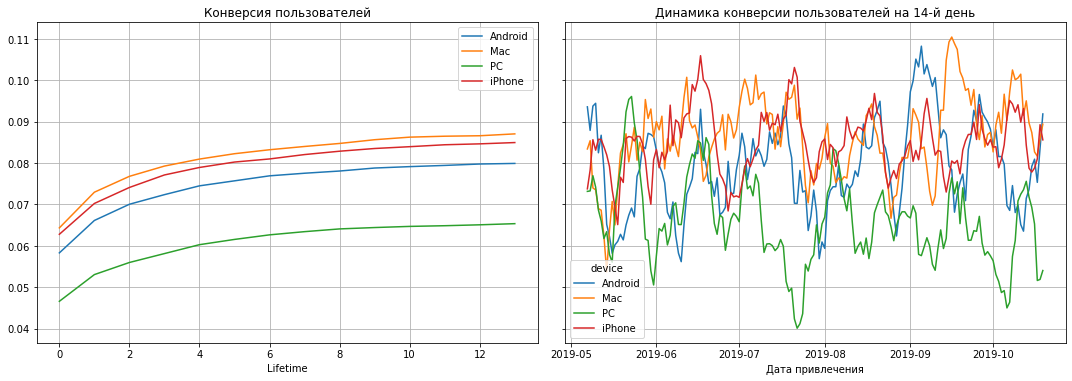

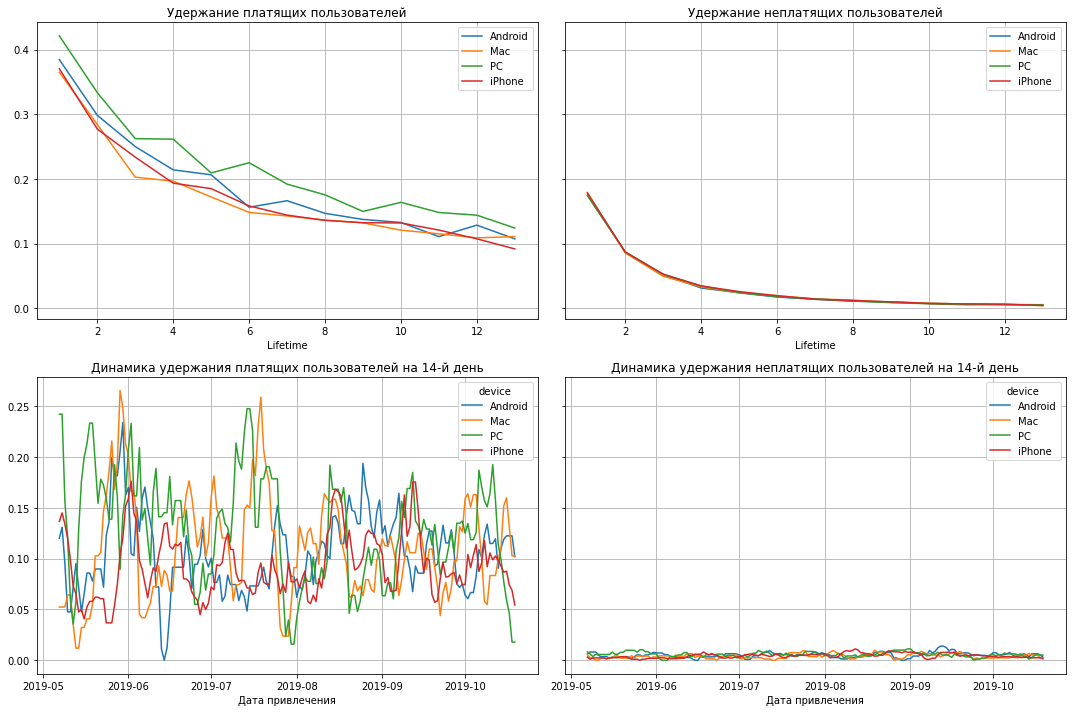

In [35]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 


retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 



Выводы:
1. Конверсия лучше на Mac и IPhone, а удержение лучше на PC. Наверно заядлые игроманы на PC более стабильный источник заработка.

5.4 Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

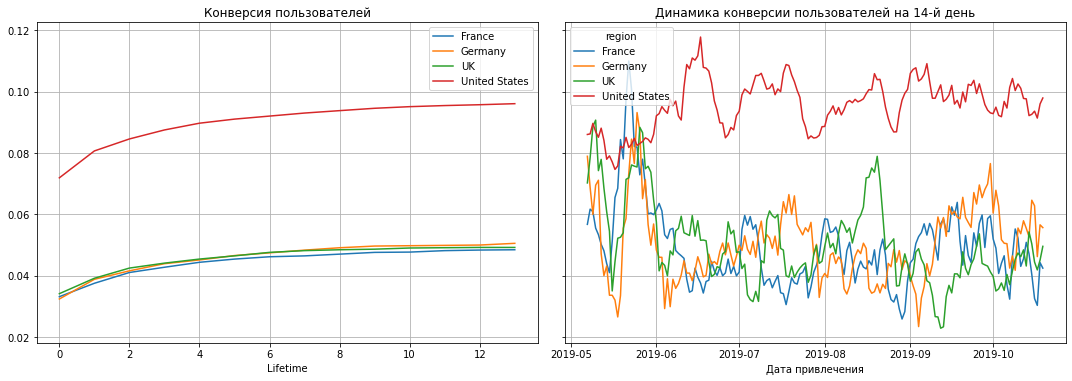

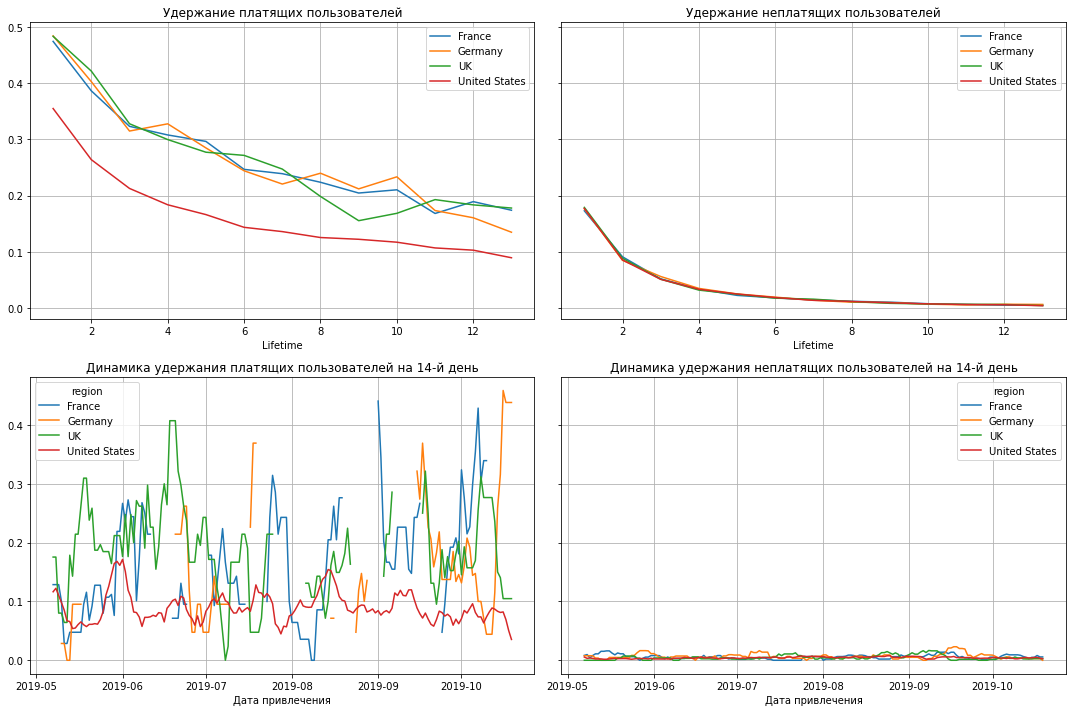

In [36]:
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 


retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 



Выводы:
1. Пользователи USA быстро появляются и быстро терябт интерес. На них можно раработать только краткосрочно.
2. Все остальные регионы, более инертны, как в плане привлечения, так и в плане удержания.

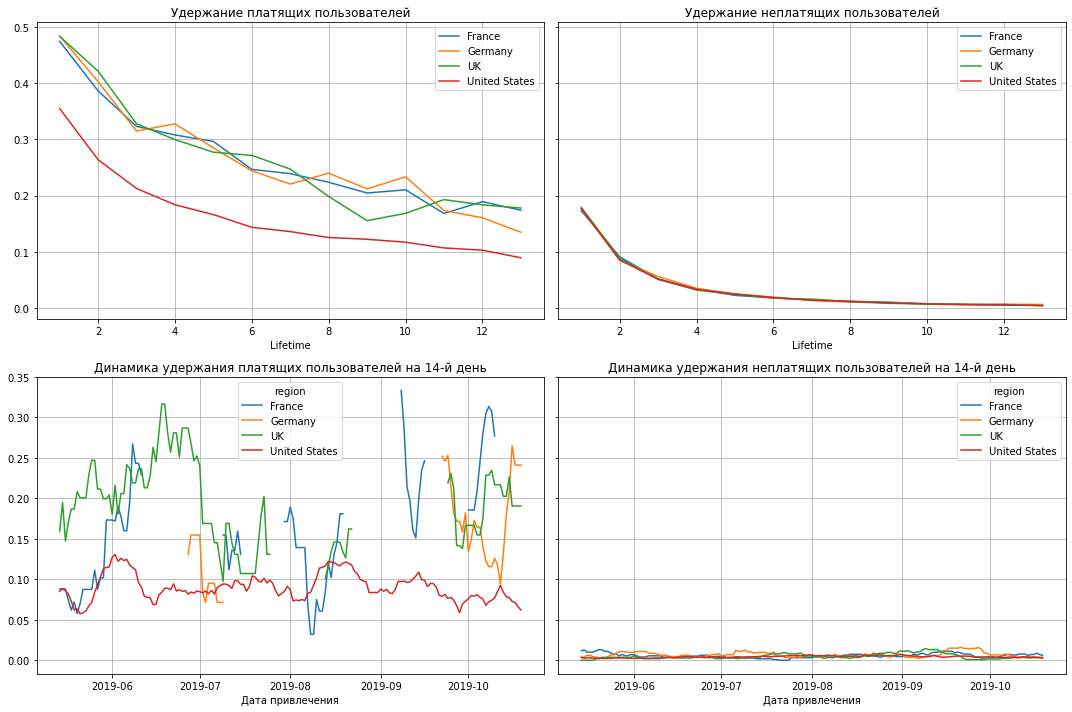

In [37]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)
 
plot_retention(retention_grouped, retention_history, horizon_days, window=14) 

5.5 Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

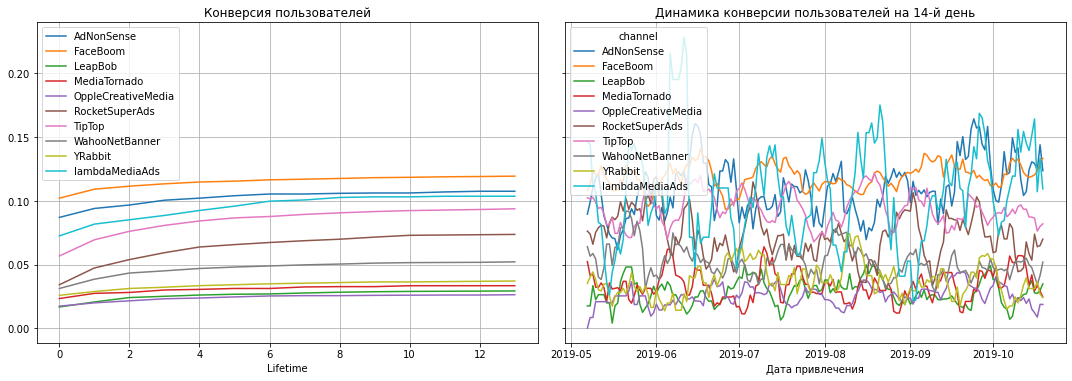

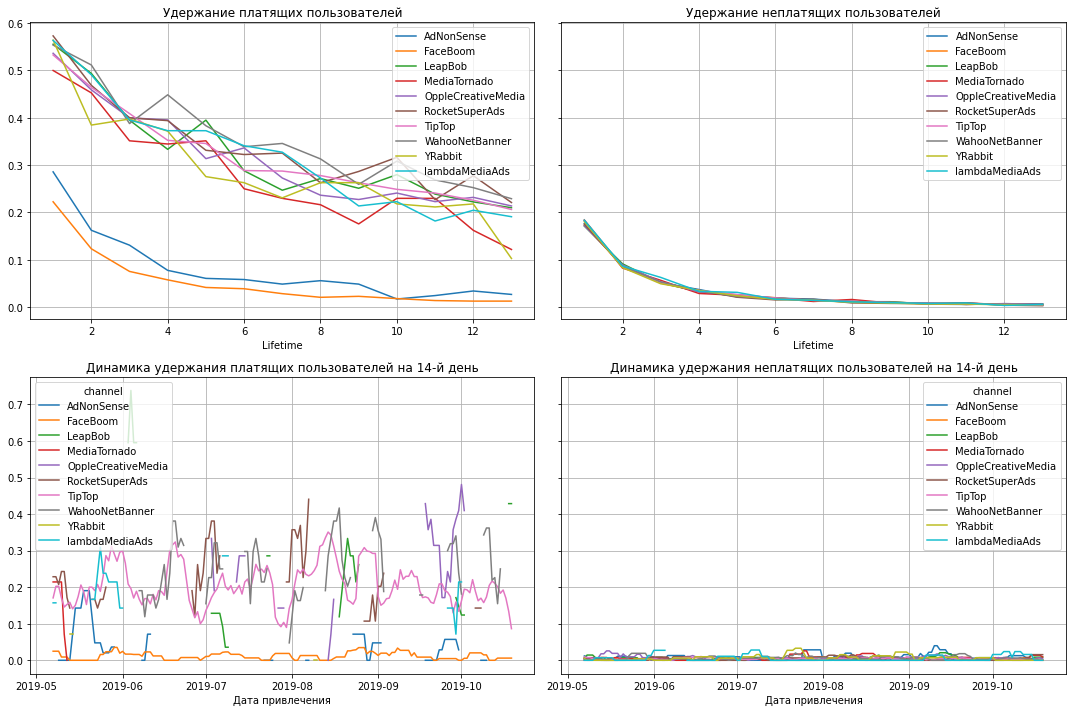

In [38]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 


retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Выводы:
1. Конверсия у пользлватели FaceBorn и AdNonScene самая вясокая, но и удержание самое низкое.
2. Остальные группы идут примерно одинаково.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

Выводы: 

1. Больше всего пользователей из США, у них самое дорогое привлечение, а уровень окупаемости самый низкий. Удержание платящих ползователей в США самое низкое.

При этом лучше всего окупается UK и France, далее немного отстает Германия. США выглядит хуже всех.

2. Удержание не платящий пользователей по всем странам одинаковое

3. Удержание платящих ползователей на 14й дениь также в США самое низкое

4. Удержание не платящих ползователей на 14й дениь опримерно одинаковое по странам. 

5. Высокая конверсия у пользователей США и при этом самое низкое удержание

6. Наиболее платежеспособные пользователи с устройстами Mac и IPhone. Но при этом эти пользователи быстро теряют интерес и перестают платить.

Причины неэффективности привлечения пользователей могут заключаться в агрессивной рекламе и навязывание ненужных услуг.

Рекомендации. Следуем стараться удерживать пользователей UK, France и Германию, в то время как USA убыточны


Заключение:
    
По сути у нас выявилось 2 основных типа пользователей. Первый тип - много приходят, платят и также много быстро уходят. Второй тип - приходит не много, но платят стабильно. Следовательно лучше конкретизировать рекламу, и стоимость привлечения, исходя из типа пользователя. А тип пользователя зависит от региона, т.к. в США все быстро, много, и сразу. А в UK, Gemrany, France - не сразу и не все, но дольше. При этом привлечение пользователес США не окупается, а в UK, Gemrany, France реклама окупается.

Рекомендуется: 
Таргетировать рекламу на пользователей Франции, Великобритакии и Германии. По возможности отказаться от каналов AdNonScene и FaseBorn. 